In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tipping/tips.csv


In [3]:
df = pd.read_csv("../input/tipping/tips.csv")
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
df.shape

(244, 7)

In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
correlation = df.corr()
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

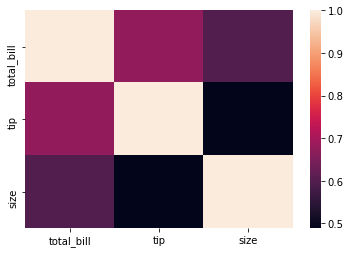

In [9]:
sns.heatmap(correlation)
plt.show()

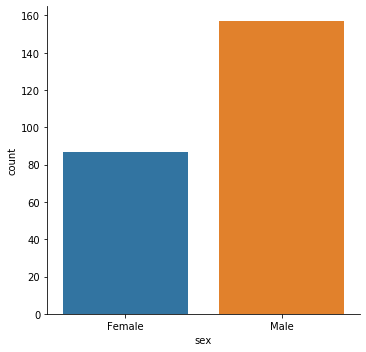

In [10]:
sns.catplot(x="sex",data=df,kind="count")
plt.show()

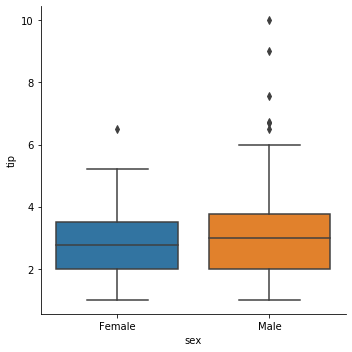

In [11]:
sns.catplot(x="sex",y="tip",data=df,kind="box")
plt.show()

In [12]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

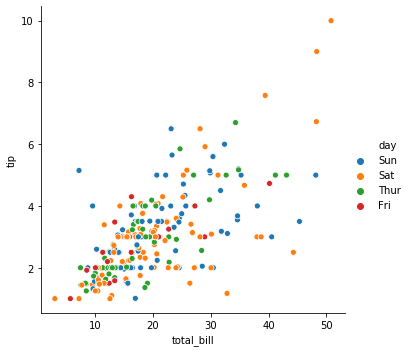

In [13]:
sns.relplot(x="total_bill",y="tip",data=df,kind="scatter",hue="day")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

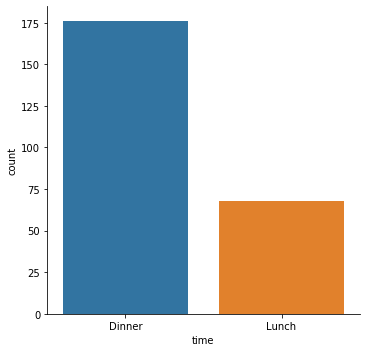

In [14]:

sns.catplot(x="time",data=df,kind="count")
plt.show

In [15]:
df.corrwith(df["total_bill"])

total_bill    1.000000
tip           0.675734
size          0.598315
dtype: float64

In [16]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
columns_to_encode = ["sex","day","time","smoker"]
columns_to_scale = ["total_bill","tip","size"]

In [18]:
df = pd.concat([df, pd.get_dummies(df["sex"],prefix="sex")], axis=1)
df = pd.concat([df, pd.get_dummies(df["day"],prefix="day")], axis=1)
df = pd.concat([df, pd.get_dummies(df["time"],prefix="time")], axis=1)
df = pd.concat([df, pd.get_dummies(df["smoker"],prefix="smoker")], axis=1)
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,smoker_No,smoker_Yes
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,0,0,1,0,1,0,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,0,0,1,0,1,0,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,0,0,1,0,1,0,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,0,0,1,0,1,0,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,0,0,1,0,1,0,1,0


In [19]:
df.drop(["sex","smoker","day","time"], axis=1, inplace=True)
df.head()

,total_bill,tip,size,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,smoker_No,smoker_Yes
0,16.99,1.01,2,1,0,0,0,1,0,1,0,1,0
1,10.34,1.66,3,0,1,0,0,1,0,1,0,1,0
2,21.01,3.50,3,0,1,0,0,1,0,1,0,1,0
3,23.68,3.31,2,0,1,0,0,1,0,1,0,1,0
4,24.59,3.61,4,1,0,0,0,1,0,1,0,1,0


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_columns = pd.DataFrame(scaler.fit_transform(df[columns_to_scale]),columns=columns_to_scale)
scaled_columns.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,0.350145,0.222031,0.313934
std,0.186477,0.153738,0.190220
min,0.000000,0.000000,0.000000
25%,0.215281,0.111111,0.200000
50%,0.308442,0.211111,0.200000
75%,0.441087,0.284722,0.400000
max,1.000000,1.000000,1.000000


In [21]:
df.drop(["total_bill","tip","size","sex_Male","smoker_No","time_Dinner"],axis=1,inplace=True)
df = pd.concat([df, scaled_columns], axis=1)

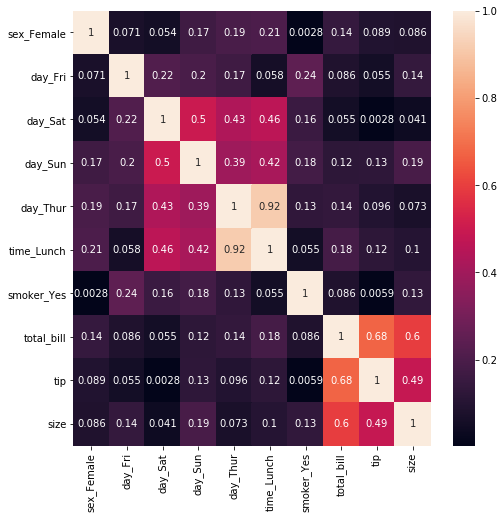

In [22]:
correlation = df.corr().abs()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, annot=True)
plt.show()

In [23]:
target = df.tip
features = df.loc[:,df.columns!="tip"]

In [24]:
from sklearn.feature_selection import SelectKBest
kbest = SelectKBest(k=5)
k_best_features = kbest.fit_transform(features, target)
list(df.columns[kbest.get_support (indices=True)])

['sex_Female', 'day_Sat', 'day_Sun', 'total_bill', 'tip']

In [25]:
df.corrwith(df["tip"]).abs().nlargest(6)

tip           1.000000
total_bill    0.675734
size          0.489299
day_Sun       0.125114
time_Lunch    0.121629
day_Thur      0.095879
dtype: float64

In [27]:
X = df[["total_bill","tip","day_Sun","day_Sat"]]
Y = df["sex_Female"]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = [{"n_neighbors":[3, 5, 9, 13, 17, 19], "weights":["uniform","distance"]}]
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X, Y)
grid_search.best_params_

{'n_neighbors': 17, 'weights': 'uniform'}

In [30]:
grid_search.best_score_

0.627

In [31]:
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(X_train, y_train)
predsvc = svclassifier.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(predsvc, y_test))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        49
           1       0.00      0.00      0.00         0

    accuracy                           0.65        49
   macro avg       0.50      0.33      0.40        49
weighted avg       1.00      0.65      0.79        49



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(svclassifier, X, Y, cv=10).mean()

0.64

In [34]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(svclassifier, X, Y, cv=skf)
print("skorlar:\n{}".format(scores))
print("skorların ortalaması:\n{}".format(scores.mean()))

skorlar:
[0.64       0.64       0.68       0.44       0.70833333 0.58333333
 0.70833333 0.75       0.5        0.75      ]
skorların ortalaması:
0.64


In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = [ {"C":[0.0001, 0.01, 0.1, 1, 10], "kernel":["poly","linear","rbf"],"gamma":[0.0001, 0.01, 0.1, 1, 10]}]
grid_search = GridSearchCV(svclassifier, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X, Y)
grid_search.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
grid_search.best_score_

0.672108843537415

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21, weights="uniform")
knn.fit(X_train, y_train)
predknn = knn.predict(X_test)
print(classification_report(y_test, predknn))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83        32
           1       0.83      0.29      0.43        17

    accuracy                           0.73        49
   macro avg       0.78      0.63      0.63        49
weighted avg       0.76      0.73      0.69        49



In [38]:
X = df[["sex_Female","tip","day_Sun","day_Sat"]]
Y = df["total_bill"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [40]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)
pred = linearreg.predict(X_test)

In [41]:
print("Coefficients: \n", linearreg.coef_)
print("Intercept: \n", linearreg.intercept_)

Coefficients: 
 [-0.02259174  0.83333732  0.04714426  0.0321765 ]
Intercept: 
 0.14493604736863192


In [42]:
X = df[["total_bill"]]
y = df.tip

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
pred = linearreg.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(pred, y_test))

0.41364531080831746


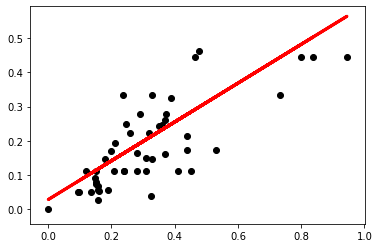

In [47]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, pred, color="red",linewidth=3)
plt.show()

In [48]:
print("Coefficients: \n", linearreg.coef_)
print("Intercept: \n", linearreg.intercept_)

Coefficients: 
 [0.56738304]
Intercept: 
 0.02817934873275582


In [50]:
X = df[["total_bill","day_Sun","day_Sat","tip","day_Thur","day_Fri"]]
Y = df["sex_Female"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [52]:
from sklearn.svm import SVC
svclassifier = SVC(C=0.0001, kernel="poly",degree=6)
svclassifier.fit(X_train, y_train)
predsvc = svclassifier.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predsvc))

0.6530612244897959


Cross validation

In [54]:
from sklearn.model_selection import cross_val_score
cross_val_score(svclassifier, X, Y, cv=5).mean()

0.6434523809523809

Shuffle Split Cross Validation

In [55]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(svclassifier, X, Y, cv=shuffle_split)
print("skorlar:\n{}".format(scores))
print("skorların ortalaması:\n{}".format(scores.mean()))

skorlar:
[0.67213115 0.62295082 0.68032787 0.63114754 0.62295082 0.68852459
 0.6147541  0.6557377  0.59836066 0.63934426]
skorların ortalaması:
0.6426229508196721


Stratified KFold

In [56]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(svclassifier, X, Y, cv=skf)
print("skorlar:\n{}".format(scores))
print("skorların ortalaması:\n{}".format(scores.mean()))

skorlar:
[0.64       0.64       0.64       0.64       0.625      0.625
 0.625      0.66666667 0.66666667 0.66666667]
skorların ortalaması:
0.6435000000000001


Grid Search

In [57]:
best_score = 0
for C in [0.0001, 0.001, 0.1, 1, 10, 100]:
    for kernel in ["poly","linear","rbf"]:
        svm = SVC(C=C, kernel=kernel)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {"C":C,"kernel":kernel}
print("Best score:{:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score:0.65
Best parameters: {'C': 0.0001, 'kernel': 'poly'}


In [58]:
#önce training+validation set ve test sete böldük
X_trainval, X_test, y_trainval, y_test = train_test_split(X, Y, test_size=0.1)
#önceki setten training seti ve validation seti çektik
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, test_size=0.1)
best_score = 0
for C in [0.0001, 0.001, 0.1, 1, 10, 100]:
    for kernel in ["poly","linear","rbf"]:
        svm = SVC(C=C, kernel=kernel)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {"C":C,"kernel":kernel}
# bulduğumuz parametrelerle model yapıp test setiyle test edicez
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score:{:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test setinde karşılaşılan skor: {:.2f}".format(test_score))

Best score:0.68
Best parameters: {'C': 100, 'kernel': 'rbf'}
Test setinde karşılaşılan skor: 0.76


Grid Search Cross Validation

In [60]:
from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
#svclassifier = SVC(C=0.0001, kernel="poly",degree=6)
param_grid = [ {"C":[0.0001, 0.01, 0.1, 1, 10], "kernel":["poly","linear","rbf"],"gamma":[0.0001, 0.01, 0.1, 1, 10]}]
#grid_search = GridSearchCV(svc, param_grid, cv=5, scoring="accuracy") # name 'svc' is not defined
grid_search = GridSearchCV(svclassifier, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X, Y)
grid_search.best_estimator_

NameError: name 'svc' is not defined

In [ ]:
print("En iyi parametreler: {}".format(grid_search.best_params_))

In [ ]:
print("En iyi CV skoru: {:.2f}".format(grid_search.best_score_))

Random Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
distributions = dict(C=uniform(loc=0, scale=4), kernel=["poly","rbf","linear"])
random = RandomizedSearchCV(svclassifier, distributions, random_state=0)
search = random.fit(X, Y)
search.best_params_

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
predknn = knn.predict(X_test)
print(accuracy_score(y_test, predknn))

In [ ]:
X = df[["total_bill","day_Sun","day_Sat","tip","day_Thur","day_Fri"]]
Y = df["sex_Female"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=8)
dtree.fit(X_train, y_train)
preddt = dtree.predict(X_test)
print(accuracy_score(y_test,preddt))

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(dtree, out_file="tree3.png", class_names=["female","male"], feature_names=X.columns)

.dot dosyalarını açmak için: dot -Tpng DocName.dot -o DocName.png

Rassal orman

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
predforest = forest.predict(X_test)
print(accuracy_score(y_test,predforest))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{"n_estimators":[5, 10, 50],"criterion":["gini","entropy"],"max_depth":[4, 6, 8, 10]}]
grid_search = GridSearchCV(forest,param_grid,cv=10,scoring="accuracy")
grid_search.fit(X,Y)
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
xgbclassifier=XGBClassifier(silent=0,objective='reg:logistic',eval_metric="logloss")
xgbclassifier.fit(X_train, y_train)
predxgb = xgbclassifier.predict(X_test)
print(classification_report(y_test,predxgb,digits=2))
print(accuracy_score(y_test, predxgb))

In [ ]:
param_grid = [{"n_estimators":[5, 10, 50],"learning_rate":[0.001, 0.01, 0.1],"max_depth":[3, 5, 10],"gamma":[0.001, 0.01, 0.1, 1]}]
grid_search = GridSearchCV(xgbclassifier,param_grid,cv=5,scoring="accuracy")
grid_search.fit(X,Y)
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor

tpot = TPOTClassifier(generations=5,verbosity=2)

tpot.fit(X_train,y_train)

In [ ]:
tpot.score(X_test, y_test)

In [ ]:
tpot.export('tpot_pipeline.py')

In [ ]:

#df = pd.concat([df, scaled_columns], axis=1)
#df.head()

In [ ]:
#df = pd.read_csv("/kaggle/input/tipping/tips.csv")
#df.head()

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df["day"] = le.fit_transform(df.day)
#df["smoker"] = le.fit_transform(df.smoker)
#df.head()

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(sparse=False)
#ohe_encoded = ohe.fit_transform(df[columns_to_encode])
#ohe_encoded